In [1]:
!git clone https://github.com/mlatsjsu/workshop-chihuahua-vs-muffin.git


Cloning into 'workshop-chihuahua-vs-muffin'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 334 (delta 0), reused 1 (delta 0), pack-reused 330
Receiving objects: 100% (334/334), 14.50 MiB | 36.13 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [2]:
%cd workshop-chihuahua-vs-muffin


/content/workshop-chihuahua-vs-muffin


In [3]:
input_height = 259
input_width = 261


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
import torch.nn as nn
import torch.nn.functional as F

#define image height and width
input_height = 224
input_width = 224

# Extends PyTorch's neural network baseclass
class MySkynet(nn.Module):
    """
    A very basic neural network.
    """
    def __init__(self, input_dim=(3, input_height, input_width)):
        """
        Constructs a neural network.

        input_dim: a tuple that represents "channel x height x width" dimensions of the input
        """
        super().__init__()
        # the total number of RGB pixels in an image is the tensor's volume
        num_in_features = input_dim[0] * input_dim


In [7]:
import torch
 # cuda:0 means the first cuda device found
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MySkynet(input_dim=(3, input_height, input_width)).to(device)  # load our simple neural network
model


MySkynet()

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline

#define image height and width
input_height = 224
input_width = 224

# Extends PyTorch's neural network baseclass
class MySkynet(nn.Module):
    """
    A very basic neural network.
    """
    def __init__(self, input_dim=(3, input_height, input_width)):
        """
        Constructs a neural network.

        input_dim: a tuple that represents "channel x height x width" dimensions of the input
        """
        super().__init__()
        # the total number of RGB pixels in an image is the tensor's volume
        num_in_features = input_dim[0] * input_dim[1] * input_dim[2]
        # input layer
        self.layer_0 = nn.Linear(num_in_features, 128)
        # hidden layers
        self.layer_1 = nn.Linear(128, 64)
        self.layer_2 = nn.Linear(64, 32)
        # output layer, output size of 2 for chihuahua and muffin
        self.layer_3 = nn.Linear(32, 2)

    def forward(self, x):
        """
        Define the forward pass through our network.
        """
        batch_size = x.shape[0]
        # convert our RGB tensor into one long vector
        x = x.view(batch_size, -1)

        # pass through our layers
        x = F.relu(self.layer_0(x))
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = self.layer_3(x)

        # convert the raw output to probability predictions
        x = F.softmax(x, dim=1)

        return x

# cuda:0 means the first cuda device found
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MySkynet(input_dim=(3, input_height, input_width)).to(device)  # load our simple neural network
model


MySkynet(
  (layer_0): Linear(in_features=150528, out_features=128, bias=True)
  (layer_1): Linear(in_features=128, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=2, bias=True)
)

In [10]:
import os  # interact with the os. in our case, we want to view the file system

print("Data contents:", os.listdir("data"))
print("Train contents:", os.listdir("data/train"))
print("Validation contents:", os.listdir("data/validation"))


Data contents: ['train', 'validation']
Train contents: ['muffin', 'chihuahua']
Validation contents: ['muffin', 'chihuahua']


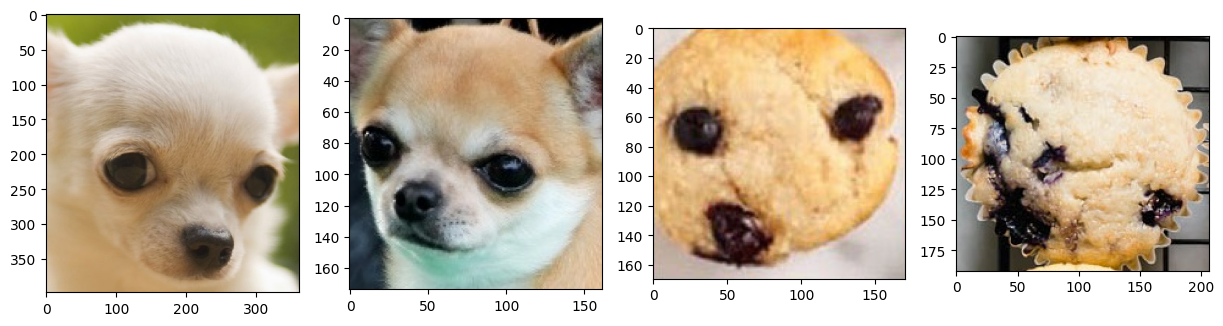

In [11]:
from PIL import Image  # import our image opening tool

_, ax = plt.subplots(1, 4, figsize=(15,60))  # to show 4 images side by side, make a "1 row x 4 column" axes
ax[0].imshow(Image.open("data/train/chihuahua/4.jpg"))  # show the chihuahua in the first column
ax[1].imshow(Image.open("data/train/chihuahua/5.jpg"))  # show the chihuahua in the second column
ax[2].imshow(Image.open("data/train/muffin/131.jpg"))   # show the muffin in the third column
ax[3].imshow(Image.open("data/train/muffin/107.jpg"))   # show the muffin in the fourth column


In [12]:
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])

# transforms for our training data
train_transforms = transforms.Compose([
    # resize to resnet input size
    transforms.Resize((input_height,input_width)),
    # transform image to PyTorch tensor object
    transforms.ToTensor(),
    normalize
])

# these validation transforms are exactly the same as our train transforms
validation_transforms = transforms.Compose([
    transforms.Resize((input_height,input_width)),
    transforms.ToTensor(),
    normalize
])

print("Train transforms:", train_transforms)


Train transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


In [13]:
image_datasets = {
    'train': datasets.ImageFolder('data/train', transform=train_transforms),
    'validation': datasets.ImageFolder('data/validation', transform=validation_transforms)
}

print("==Train Dataset==\n", image_datasets["train"])
print()
print("==Validation Dataset==\n", image_datasets["validation"])


==Train Dataset==
 Dataset ImageFolder
    Number of datapoints: 120
    Root location: data/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

==Validation Dataset==
 Dataset ImageFolder
    Number of datapoints: 30
    Root location: data/validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


In [14]:
batch_size = 32  # You can choose an appropriate batch size

dataloaders = {
    'train': torch.utils.data.DataLoader(
        image_datasets['train'],
        batch_size=batch_size,
        shuffle=True,
        num_workers=4),
    'validation': torch.utils.data.DataLoader(
        image_datasets['validation'],
        batch_size=batch_size,
        shuffle=False,
        num_workers=4)
}

print("Train loader:", dataloaders["train"])
print("Validation loader:", dataloaders["validation"])


Train loader: <torch.utils.data.dataloader.DataLoader object at 0x7877efa11390>
Validation loader: <torch.utils.data.dataloader.DataLoader object at 0x7877efa10eb0>


In [15]:
next(iter(dataloaders["train"]))


[tensor([[[[ 0.2863,  0.2784,  0.2627,  ..., -0.3804, -0.4039, -0.4196],
           [ 0.2784,  0.2706,  0.2549,  ..., -0.4745, -0.3098, -0.2863],
           [ 0.2706,  0.2627,  0.2471,  ..., -0.7333, -0.6627, -0.6157],
           ...,
           [ 0.2392,  0.2235,  0.2078,  ...,  0.0353,  0.0039, -0.0353],
           [ 0.2314,  0.2157,  0.2000,  ...,  0.0431,  0.0118, -0.0353],
           [ 0.2392,  0.2078,  0.1922,  ...,  0.0431,  0.0118, -0.0431]],
 
          [[ 0.2863,  0.2784,  0.2627,  ..., -0.3804, -0.4039, -0.4196],
           [ 0.2784,  0.2706,  0.2549,  ..., -0.4745, -0.3098, -0.2863],
           [ 0.2706,  0.2627,  0.2471,  ..., -0.7333, -0.6627, -0.6157],
           ...,
           [ 0.2471,  0.2314,  0.2157,  ..., -0.0353, -0.0667, -0.1137],
           [ 0.2392,  0.2235,  0.2078,  ..., -0.0275, -0.0588, -0.1137],
           [ 0.2471,  0.2157,  0.2000,  ..., -0.0275, -0.0588, -0.1216]],
 
          [[ 0.3020,  0.2941,  0.2784,  ..., -0.3804, -0.4039, -0.4196],
           [ 

In [16]:
from tqdm import tnrange, tqdm_notebook # import progress bars to show train progress

def train_model(model, dataloaders, loss_function, optimizer, num_epochs):
    """
    Trains a model using the given loss function and optimizer, for a certain number of epochs.

    model: a PyTorch neural network
    loss_function: a mathematical function that compares predictions and labels to return an error
    num_epochs: the number of times to run through the full training dataset
    """
    # train for n epochs. an epoch is a full iteration through our dataset
    for epoch in tnrange(num_epochs, desc="Total progress", unit="epoch"):
        # print a header
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('----------------')

        # first train over the dataset and update weights; at the end, calculate our validation performance
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            # keep track of the overall loss and accuracy for this batch
            running_loss = 0.0
            running_corrects = 0

            # iterate through the inputs and labels in our dataloader
            # (the tqdm_notebook part is to display a progress bar)
            for inputs, labels in tqdm_notebook(dataloaders[phase], desc=phase, unit="batch", leave=False):
                # move inputs and labels to appropriate device (GPU or CPU)
                inputs = inputs.to(device)
                labels = labels.to(device)

                # FORWARD PASS
                outputs = model(inputs)
                # compute the error of the model's predictions
                loss = loss_function(outputs, labels)

                if phase == 'train':
                    # BACKWARD PASS
                    optimizer.zero_grad()  # clear the previous gradients
                    loss.backward()        # backpropagate the current error gradients
                    optimizer.step()       # update the weights (i.e. do the learning)

                # track our accumulated loss
                running_loss += loss.item() * inputs.size(0)
                # track number of correct to compute accuracy
                _, preds = torch.max(outputs, 1)
                running_corrects += torch.sum(preds == labels.data)

            # print our progress
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])
            print(f'{phase} error: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        print()


In [17]:
loss_function = nn.CrossEntropyLoss()              # the most common error function in deep learning
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent, with a learning rate of 0.1


In [18]:
train_model(model, dataloaders, loss_function, optimizer, num_epochs=3)


<ipython-input-16-9ff2969135a4>:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for epoch in tnrange(num_epochs, desc="Total progress", unit="epoch"):


Total progress:   0%|          | 0/3 [00:00<?, ?epoch/s]

Epoch 1/3
----------------


<ipython-input-16-9ff2969135a4>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for inputs, labels in tqdm_notebook(dataloaders[phase], desc=phase, unit="batch", leave=False):


train:   0%|          | 0/4 [00:00<?, ?batch/s]

train error: 0.6631, Accuracy: 0.5667


validation:   0%|          | 0/1 [00:00<?, ?batch/s]

validation error: 0.5600, Accuracy: 0.7000

Epoch 2/3
----------------


train:   0%|          | 0/4 [00:00<?, ?batch/s]

train error: 0.5333, Accuracy: 0.8000


validation:   0%|          | 0/1 [00:00<?, ?batch/s]

validation error: 0.4949, Accuracy: 0.8333

Epoch 3/3
----------------


train:   0%|          | 0/4 [00:00<?, ?batch/s]

train error: 0.4601, Accuracy: 0.9167


validation:   0%|          | 0/1 [00:00<?, ?batch/s]

validation error: 0.4856, Accuracy: 0.8333



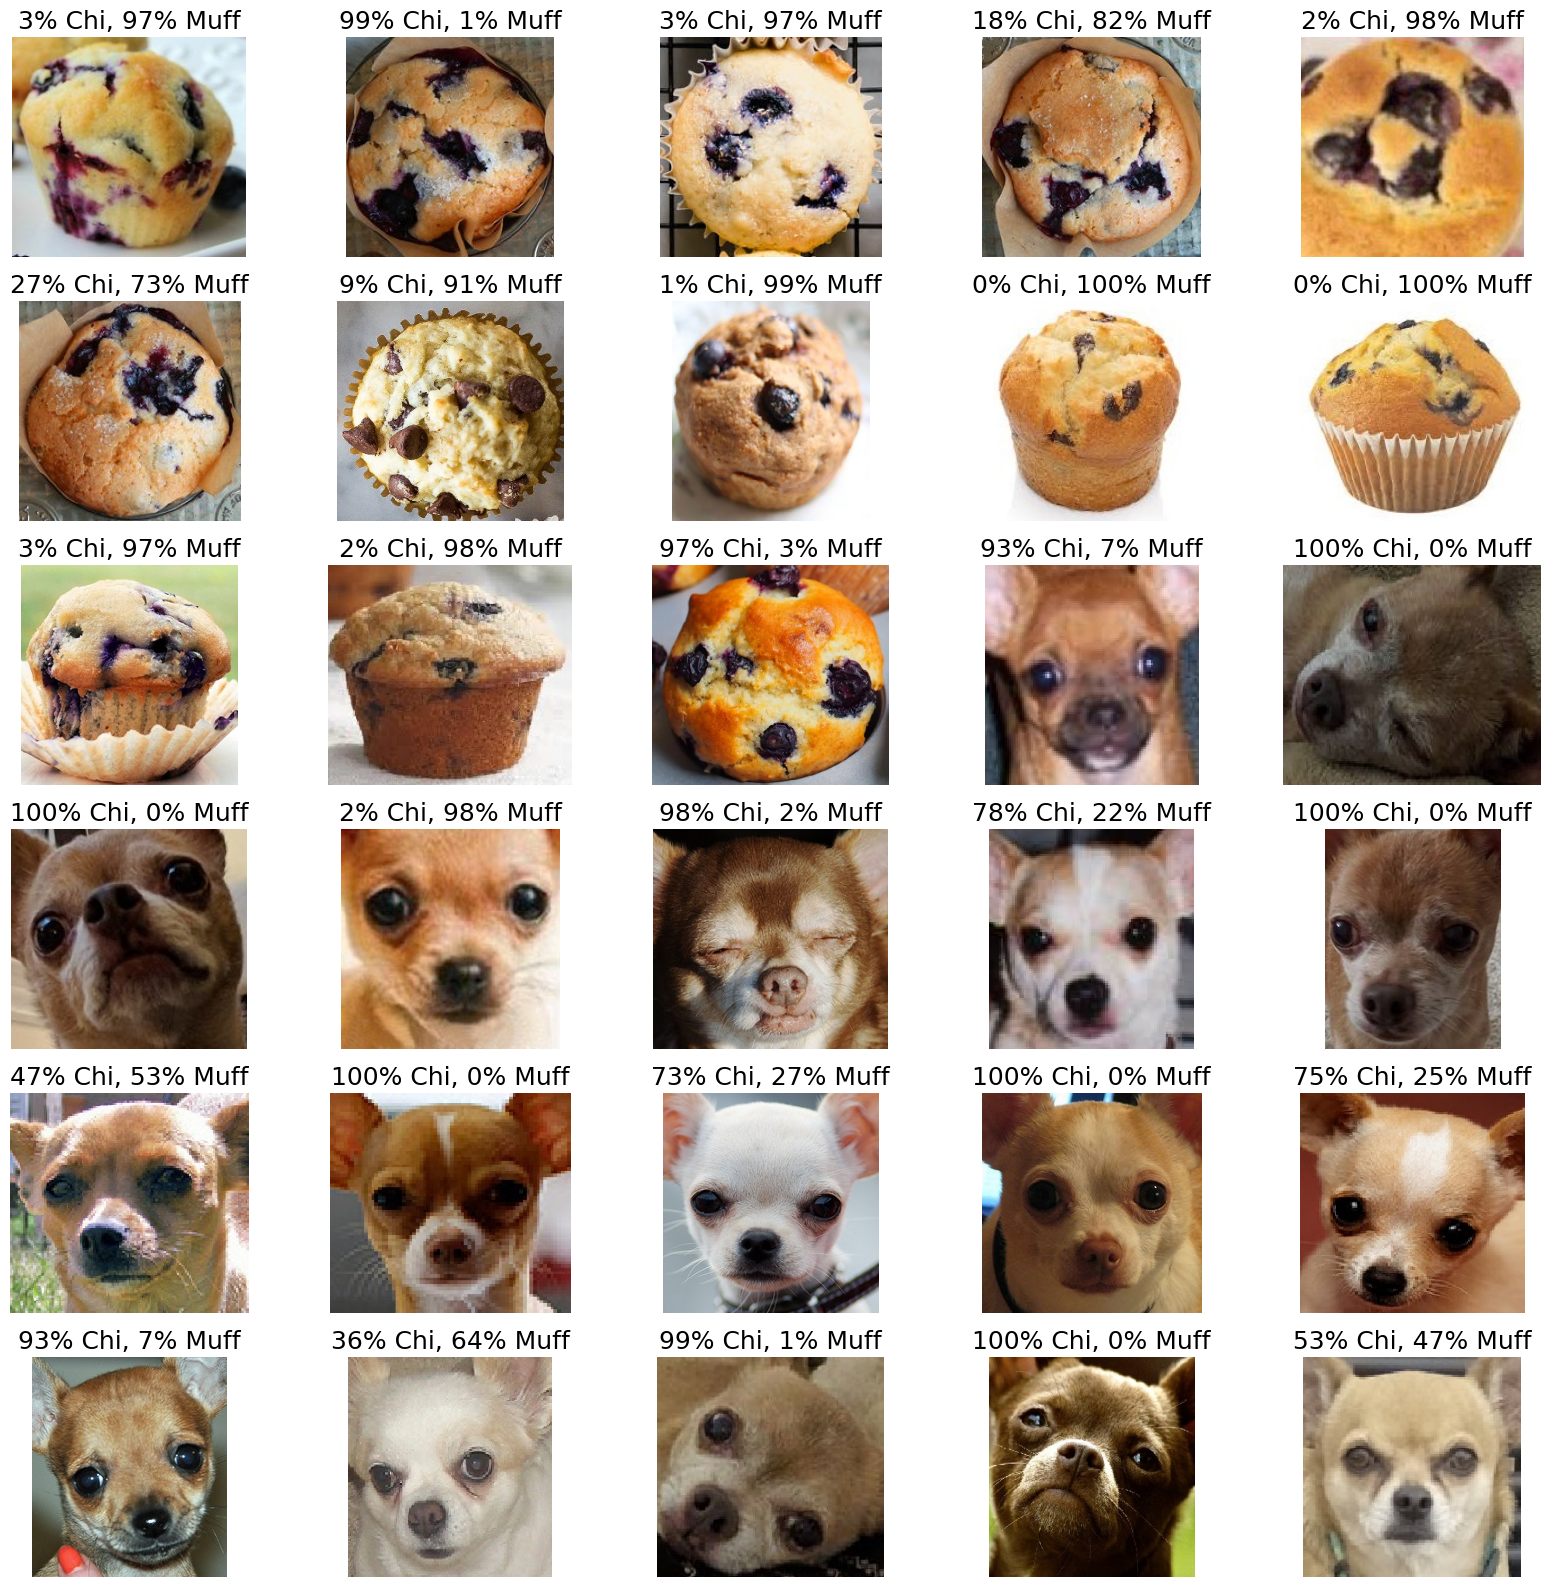

In [19]:
from glob import glob
from math import floor

# get all the images from our validation sets
validation_img_paths = glob("data/validation/**/*.jpg", recursive=True)
images = [Image.open(img_path) for img_path in validation_img_paths]

# put all the images together to run through our model
validation_batch = torch.stack( [validation_transforms(img).to(device) for img in images])
pred_logits_tensor = model(validation_batch)
pred_probs = pred_logits_tensor.cpu().data.numpy()

# show the probabilities for each picture
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
for i, img in enumerate(images):
    ax = axs[floor(i/5)][i % 5]
    ax.axis('off')
    ax.set_title("{:.0f}% Chi, {:.0f}% Muff".format(100*pred_probs[i,0], 100*pred_probs[i,1]), fontsize=18)
    ax.imshow(img)
